In [ ]:
#!pip install scikit_posthocs

In [ ]:
#!pip install pingouin

In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import math
import scipy
import pingouin as pg
import scikit_posthocs as sp

#from google.colab import files

from sklearn import linear_model
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [9]:
LevodopaChallengeWideClinical = pd.read_csv('LevodopaChallengeWideClinical.csv', sep = ';')


In [10]:
LevodopaChallengeWideClinical

,patient,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,A,2,6,5,5,4,0,4,0,0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,1,5,5,5,2,0,3,1,2,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,1,3,5,3,2,2,3,0,0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,D,2,4,4,2,2,4,0,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,2,3,3,1,2,4,0,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,F,3,4,4,3,4,2,4,2,4,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,G,3,4,4,4,2,2,3,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H,2,4,4,4,2,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,I,1,4,4,3,1,0,0,2,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,J,1,3,4,4,1,0,0,0,4,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


<AxesSubplot:>

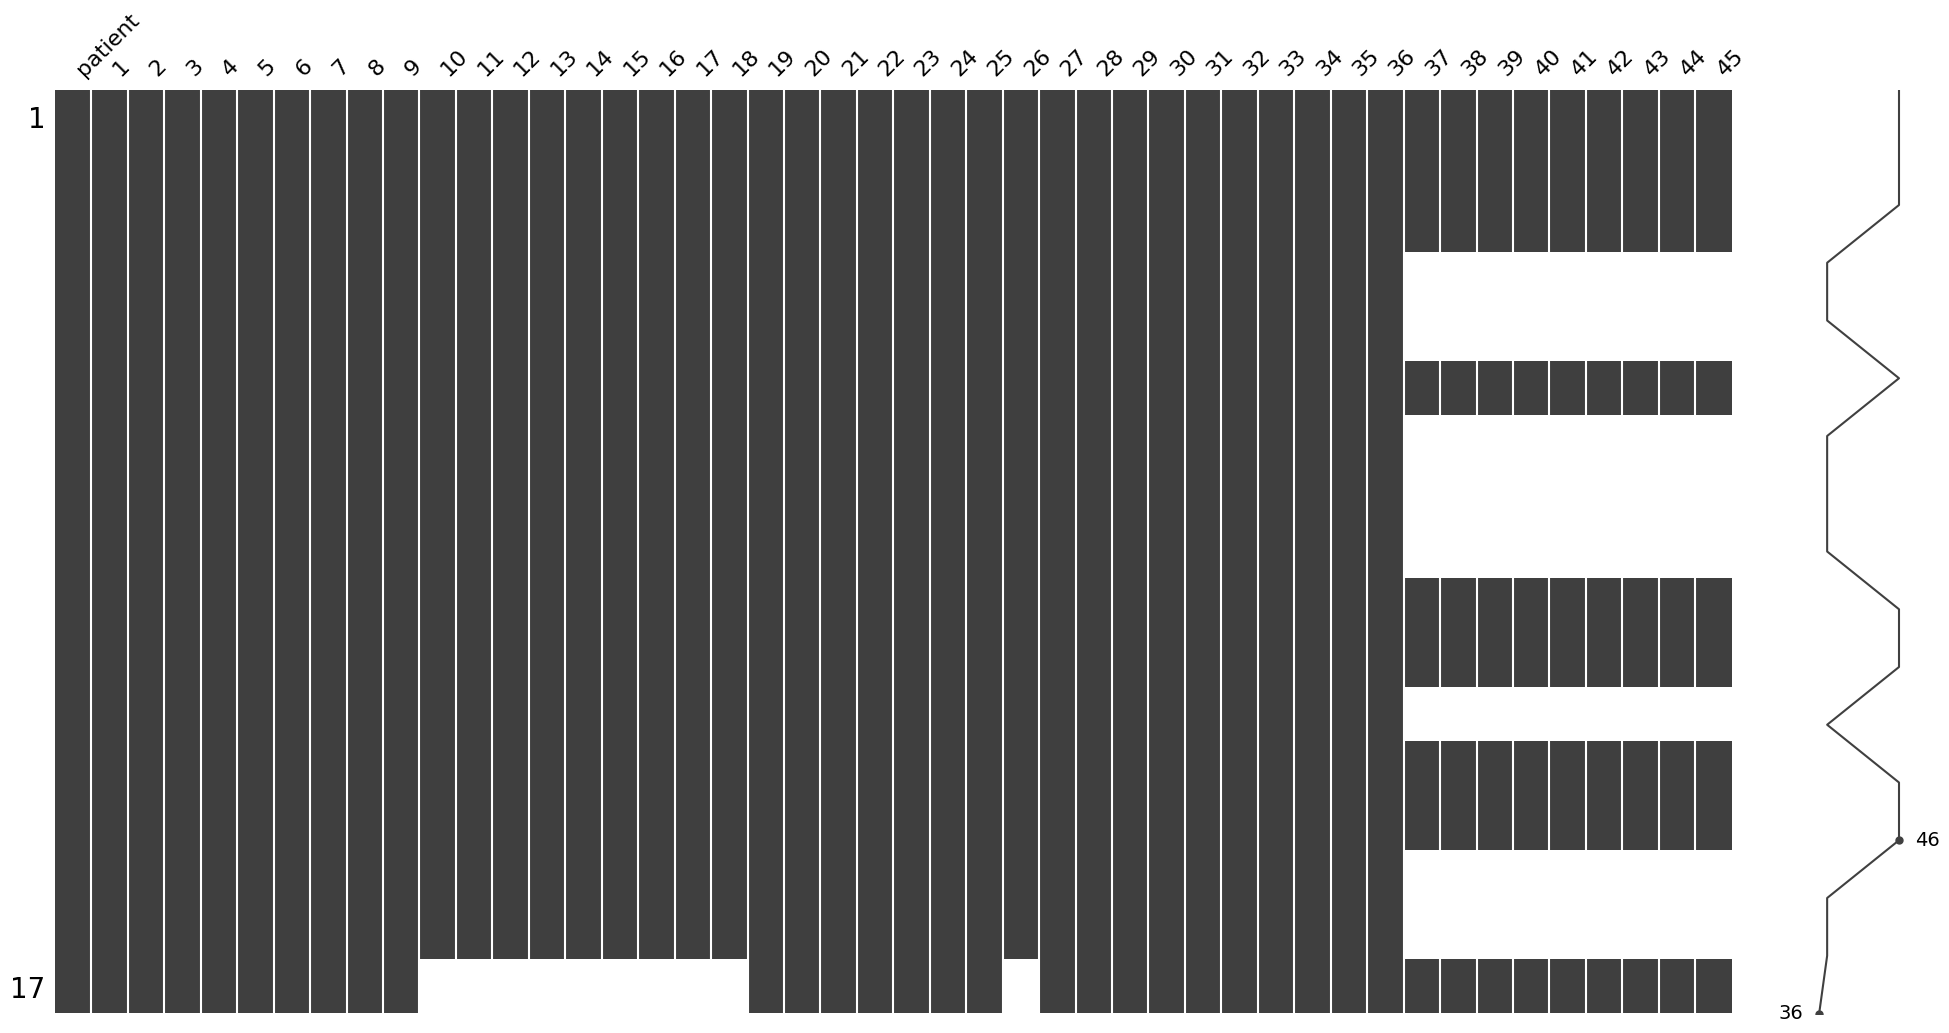

In [11]:
mno.matrix(LevodopaChallengeWideClinical,figsize = (24,12))

In [12]:
# Remove patient index

patid_LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,0:1]

In [13]:
# Select remianing, numeric variables

LevodopaChallengeWideClinical = LevodopaChallengeWideClinical.iloc[:,1:46]

In [14]:
LevodopaChallengeWideClinical

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,2,6,5,5,4,0,4,0,0,2.0,...,0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5,5,2,0,3,1,2,1.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,5,3,2,2,3,0,0,1.0,...,0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2,4,4,2,2,4,0,0,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,3,3,1,2,4,0,1,1,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,4,4,3,4,2,4,2,4,2.0,...,1,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
6,3,4,4,4,2,2,3,0,0,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,4,4,4,2,0,0,0,0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,4,4,3,1,0,0,2,3,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,3,4,4,1,0,0,0,4,1.0,...,3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0


In [15]:
missing_columns = list(LevodopaChallengeWideClinical)
missing_columns

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45']

In [ ]:
# Rename new variables
for feature in missing_columns:
    LevodopaChallengeWideClinical[feature + '_imp'] = LevodopaChallengeWideClinical[feature]
    LevodopaChallengeWideClinical = random_imputation(LevodopaChallengeWideClinical, feature)

In [ ]:
# Estimate the missing data using a regression modl

# Input estimates only (!) on the rows/colunms where the original data was missing (i.e. substitute the random numbers introduced above)

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = LevodopaChallengeWideClinical[feature + "_imp"]
    parameters = list(set(LevodopaChallengeWideClinical.columns) - set(missing_columns) - {feature + '_imp'})
    

    model = linear_model.LinearRegression()
    model.fit(X = LevodopaChallengeWideClinical[parameters], y = LevodopaChallengeWideClinical[feature + '_imp'])
    
    deter_data.loc[LevodopaChallengeWideClinical[feature].isnull(), "Det" + feature] = model.predict(LevodopaChallengeWideClinical[parameters])[LevodopaChallengeWideClinical[feature].isnull()]


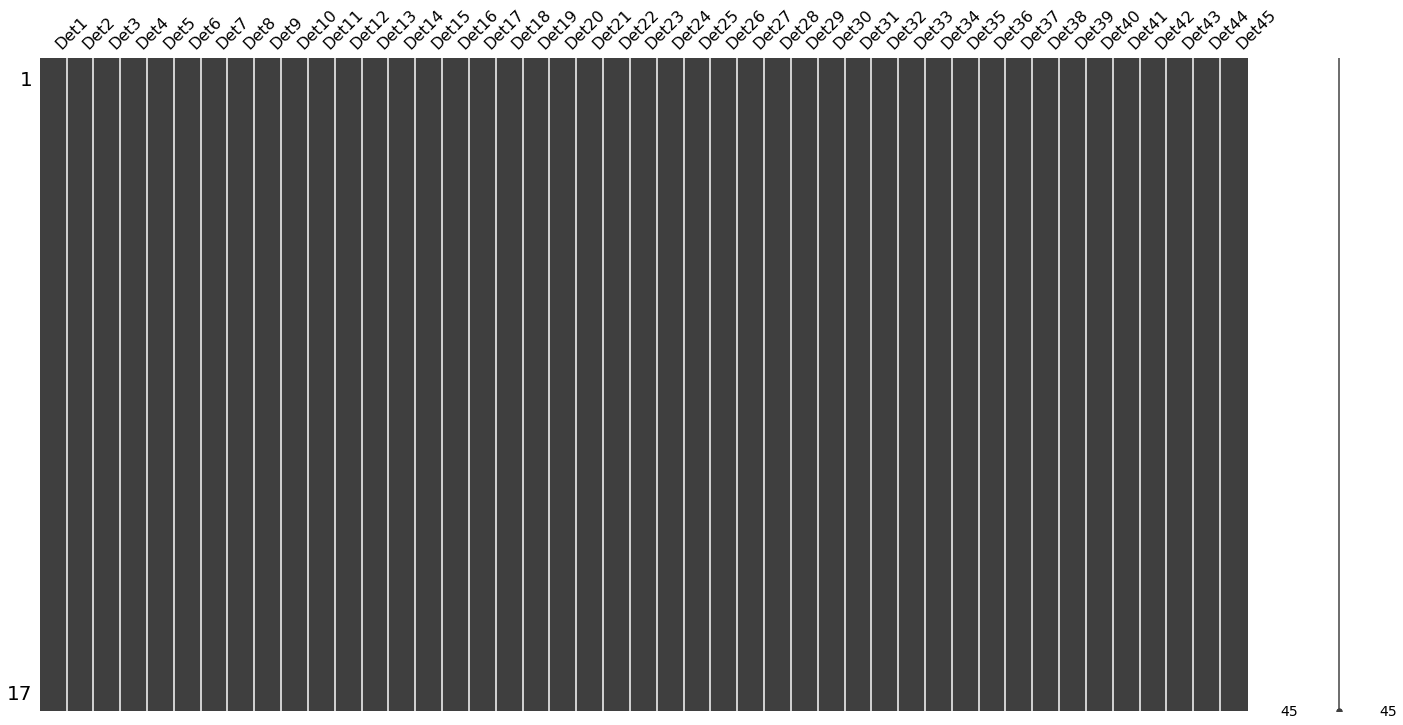

In [ ]:
mno.matrix(deter_data, figsize = (24,12))


In [ ]:
deter_data.to_csv('output_wide_clinical.csv', encoding = 'utf-8-sig') 
files.download('output_wide_clinical.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
output_wide_clinical = pd.read_csv('output_wide_clinical.csv', sep = ';')

In [18]:
output_wide_clinical

,patient,Item_3.1,Item_3.3,Item_3.4,Item_3.8,Item_3.10,Item_3.11,Item_3.12,Item_3.15,Item_3.17,Short_MDS-UPDRS_III,Axial_Score,Group
0,A,2,6,5,5,4,0,4,0,0,26,10,OFF
1,B,1,5,5,5,2,0,3,1,2,24,6,OFF
2,C,1,3,5,3,2,2,3,0,0,19,8,OFF
3,D,2,4,4,2,2,4,0,0,1,19,8,OFF
4,E,2,3,3,1,2,4,0,1,1,17,8,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,M,3,0,6,5,2,2,0,0,0,18,7,80min
81,N,1,2,4,4,0,0,3,0,0,14,4,80min
82,O,3,0,4,0,1,0,0,2,0,10,4,80min
83,P,1,4,4,0,1,0,0,0,0,10,2,80min


In [19]:
list(output_wide_clinical)

['patient',
 'Item_3.1',
 'Item_3.3',
 'Item_3.4',
 'Item_3.8',
 'Item_3.10',
 'Item_3.11',
 'Item_3.12',
 'Item_3.15',
 'Item_3.17',
 'Short_MDS-UPDRS_III',
 'Axial_Score',
 'Group']

# MDS-UPDRS III

In [20]:
output_wide_clinical.groupby("Group").describe()["Short_MDS-UPDRS_III"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,18.470588,3.124853,14.0,16.0,18.0,21.0,24.0
40min,17.0,11.411765,5.292197,4.0,8.0,11.0,13.0,22.0
60min,17.0,8.352941,4.513053,0.0,5.0,8.0,11.0,17.0
80min,17.0,8.352941,4.923682,1.0,5.0,8.0,10.0,18.0
OFF,17.0,21.705882,5.709255,15.0,18.0,20.0,24.0,38.0


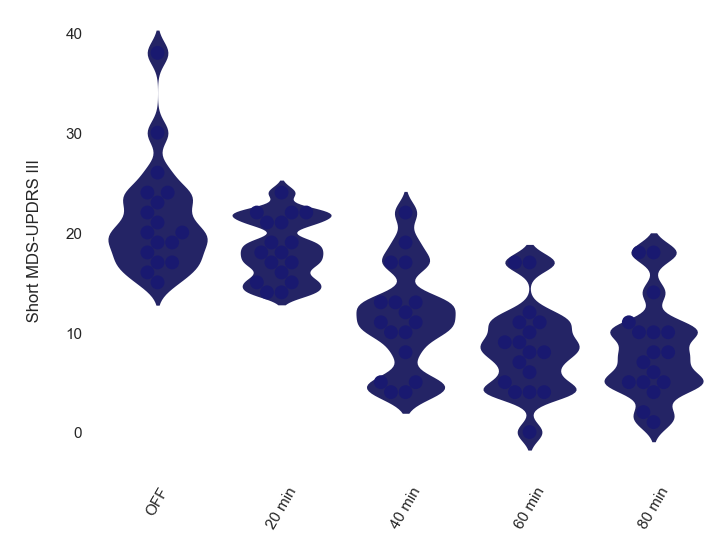

In [6]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Short_MDS-UPDRS_III", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Short_MDS-UPDRS_III", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Short MDS-UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [ ]:
pg.friedman(data=output_wide_clinical, dv="Short_MDS-UPDRS_III", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.839037,4,57.054545,1.204998e-11


In [ ]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Short_MDS-UPDRS_III", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000e+00,0.286132,0.000254,7.017295e-07,0.000008
20min,2.861318e-01,1.000000,0.007652,1.893347e-05,0.000254
40min,2.541463e-04,0.007652,1.000000,6.905042e-02,0.286132
60min,7.017295e-07,0.000019,0.069050,1.000000e+00,0.417502
80min,8.333659e-06,0.000254,0.286132,4.175023e-01,1.000000


# AXIAL SCORE


In [ ]:
output_wide_clinical.groupby("Group").describe()["Axial_Score"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,4.823529,2.242635,2.0,3.0,4.0,7.0,9.0
40min,17.0,3.352941,1.868863,1.0,2.0,3.0,5.0,7.0
60min,17.0,2.235294,1.521899,0.0,1.0,2.0,3.0,6.0
80min,17.0,2.235294,1.855041,0.0,1.0,2.0,4.0,7.0
OFF,17.0,6.882353,3.461978,2.0,5.0,6.0,8.0,14.0


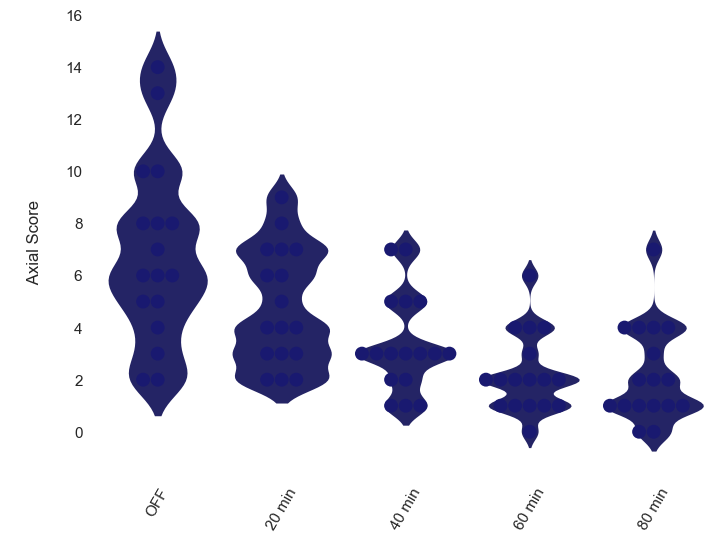

In [7]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Axial_Score", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Axial_Score", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [ ]:
pg.friedman(data=output_wide_clinical, dv="Axial_Score", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.657682,4,44.722408,4.540960e-09


In [ ]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Axial_Score", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.213886,0.001212,0.000009,0.000025
20min,0.213886,1.000000,0.042148,0.000445,0.001212
40min,0.001212,0.042148,1.000000,0.115162,0.213886
60min,0.000009,0.000445,0.115162,1.000000,0.648414
80min,0.000025,0.001212,0.213886,0.648414,1.000000


# Item 3.1


In [7]:
output_wide_clinical.groupby("Group").describe()["Item_3.1"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.705882,0.685994,1.0,1.0,2.0,2.0,3.0
40min,17.0,1.529412,0.717430,1.0,1.0,1.0,2.0,3.0
60min,17.0,1.294118,0.685994,0.0,1.0,1.0,2.0,3.0
80min,17.0,1.117647,0.857493,0.0,1.0,1.0,1.0,3.0
OFF,17.0,1.941176,0.747545,1.0,1.0,2.0,2.0,3.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


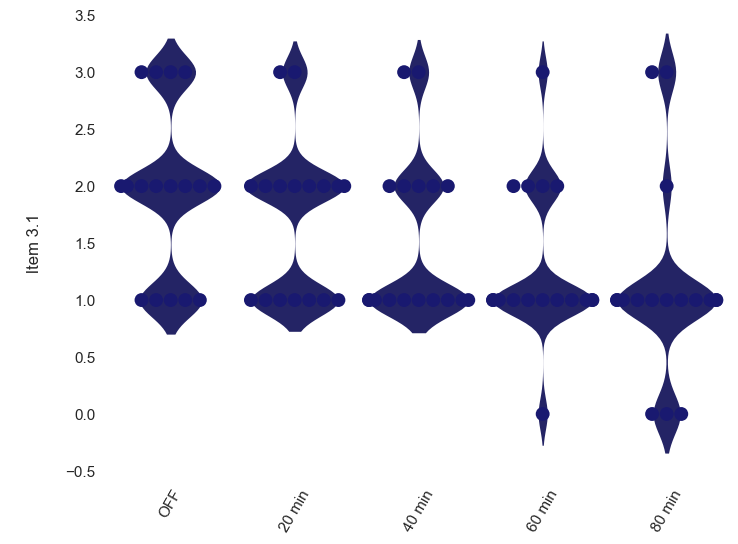

In [8]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.1", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.1", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.1 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [10]:
pg.friedman(data=output_wide_clinical, dv="Item_3.1", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.386404,4,26.275449,0.000028


In [11]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.1", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.237475,0.037146,0.001181,0.000361
20min,0.237475,1.000000,0.310437,0.031150,0.009121
40min,0.037146,0.310437,1.000000,0.205190,0.078227
60min,0.001181,0.031150,0.205190,1.000000,0.587329
80min,0.000361,0.009121,0.078227,0.587329,1.000000


# Item 3.3


In [12]:
output_wide_clinical.groupby("Group").describe()["Item_3.3"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,3.882353,1.166316,2.0,3.0,4.0,5.0,6.0
40min,17.0,2.470588,1.585782,0.0,2.0,2.0,3.0,6.0
60min,17.0,1.823529,1.333946,0.0,1.0,2.0,2.0,5.0
80min,17.0,1.294118,1.649421,0.0,0.0,1.0,2.0,5.0
OFF,17.0,4.176471,1.286239,2.0,3.0,4.0,5.0,7.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


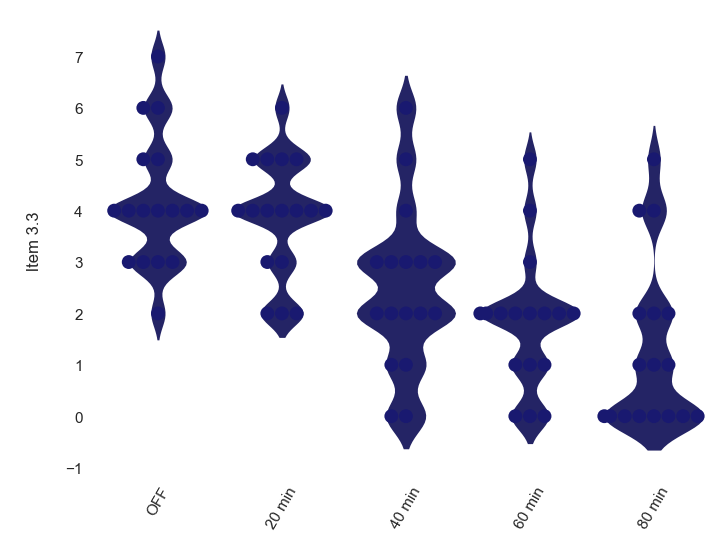

In [9]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.3", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.3", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.3 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [15]:
pg.friedman(data=output_wide_clinical, dv="Item_3.3", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.731185,4,49.720588,4.129951e-10


In [16]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.3", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.510461,0.002561,0.000025,0.000006
20min,0.510461,1.000000,0.014475,0.000202,0.000025
40min,0.002561,0.014475,1.000000,0.171830,0.048637
60min,0.000025,0.000202,0.171830,1.000000,0.510461
80min,0.000006,0.000025,0.048637,0.510461,1.000000


# Item 3.4


In [17]:
output_wide_clinical.groupby("Group").describe()["Item_3.4"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,4.352941,0.931476,3.0,4.0,4.0,5.0,6.0
40min,17.0,3.294118,1.611083,1.0,2.0,3.0,4.0,6.0
60min,17.0,2.647059,1.617914,0.0,1.0,3.0,4.0,6.0
80min,17.0,3.000000,1.457738,1.0,2.0,4.0,4.0,6.0
OFF,17.0,4.588235,0.870260,3.0,4.0,4.0,5.0,6.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


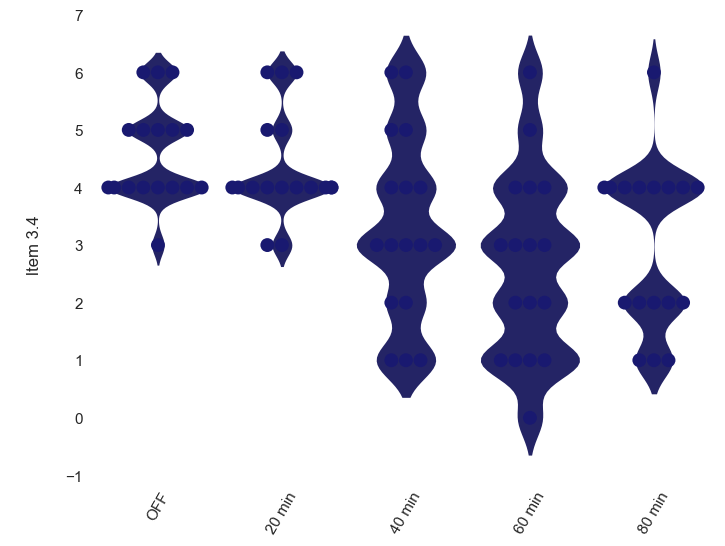

In [10]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.4", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.4", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.4 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [19]:
pg.friedman(data=output_wide_clinical, dv="Item_3.4", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.557081,4,37.881481,1.185447e-07


In [20]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.4", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.508832,0.002961,0.000056,0.000475
20min,0.508832,1.000000,0.016548,0.000310,0.002961
40min,0.002961,0.016548,1.000000,0.154076,0.508832
60min,0.000056,0.000310,0.154076,1.000000,0.460433
80min,0.000475,0.002961,0.508832,0.460433,1.000000


# Item 3.8


In [ ]:
output_wide_clinical.groupby("Group").describe()["Item_3.8"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,4.352941,0.931476,3.0,4.0,4.0,5.0,6.0
40min,17.0,3.294118,1.611083,1.0,2.0,3.0,4.0,6.0
60min,17.0,2.647059,1.617914,0.0,1.0,3.0,4.0,6.0
80min,17.0,3.000000,1.457738,1.0,2.0,4.0,4.0,6.0
OFF,17.0,4.588235,0.870260,3.0,4.0,4.0,5.0,6.0


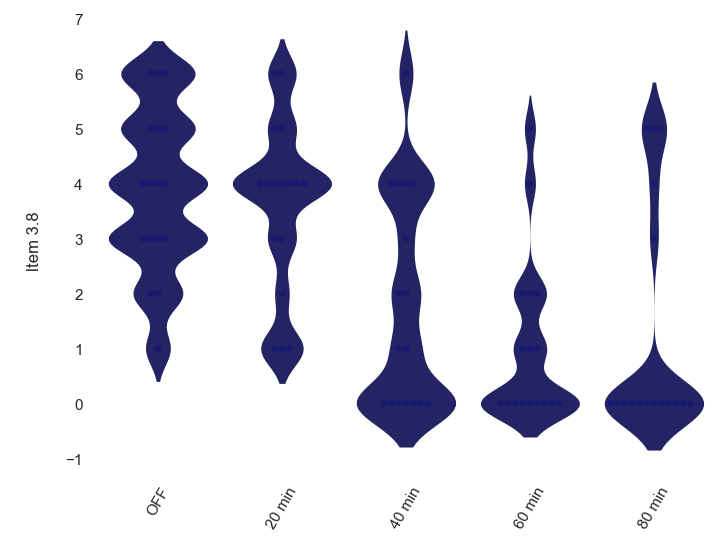

In [13]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.8", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.8", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.8 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [22]:
pg.friedman(data=output_wide_clinical, dv="Item_3.8", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.595664,4,40.505119,3.402799e-08


In [23]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.8", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.810609,0.003177,0.000171,0.000171
20min,0.810609,1.000000,0.007358,0.000211,0.000288
40min,0.003177,0.007358,1.000000,0.268399,0.314224
60min,0.000171,0.000211,0.268399,1.000000,0.862711
80min,0.000171,0.000288,0.314224,0.862711,1.000000


# Item 3.10


In [24]:
output_wide_clinical.groupby("Group").describe()["Item_3.10"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.529412,0.717430,0.0,1.0,2.0,2.0,2.0
40min,17.0,1.058824,0.658653,0.0,1.0,1.0,1.0,2.0
60min,17.0,0.529412,0.624264,0.0,0.0,0.0,1.0,2.0
80min,17.0,0.352941,0.606339,0.0,0.0,0.0,1.0,2.0
OFF,17.0,2.176471,0.951006,1.0,2.0,2.0,2.0,4.0


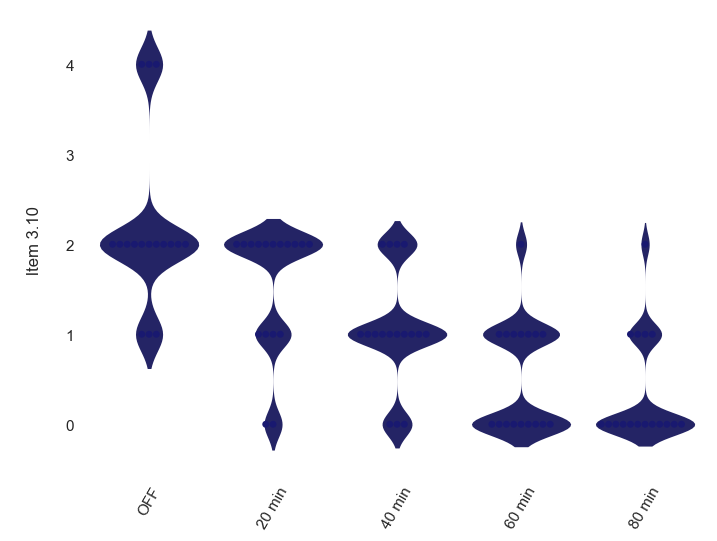

In [14]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.10", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.10", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.10 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [26]:
pg.friedman(data=output_wide_clinical, dv="Item_3.10", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.629654,4,42.816479,1.129607e-08


In [27]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.10", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.166348,0.006897,0.000025,0.000010
20min,0.166348,1.000000,0.148920,0.001979,0.000660
40min,0.006897,0.148920,1.000000,0.080405,0.034745
60min,0.000025,0.001979,0.080405,1.000000,0.672067
80min,0.000010,0.000660,0.034745,0.672067,1.000000


# Item 3.11


In [28]:
output_wide_clinical.groupby("Group").describe()["Item_3.11"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.941176,1.434860,0.0,0.0,0.0,2.0,4.0
40min,17.0,0.294118,0.469668,0.0,0.0,0.0,1.0,1.0
60min,17.0,0.117647,0.485071,0.0,0.0,0.0,0.0,2.0
80min,17.0,0.235294,0.664211,0.0,0.0,0.0,0.0,2.0
OFF,17.0,1.294118,1.531531,0.0,0.0,1.0,2.0,4.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


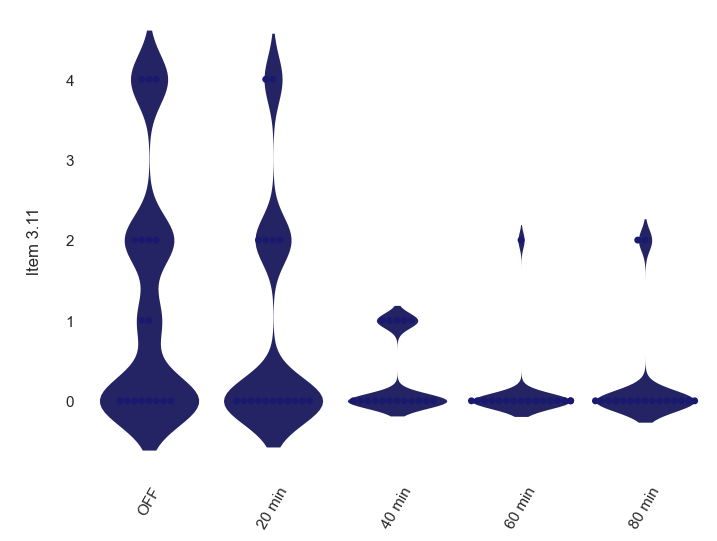

In [15]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.11", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.11", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.11 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [ ]:
pg.friedman(data=output_wide_clinical, dv="Item_3.11", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.629654,4,42.816479,1.129607e-08


In [30]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.11", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.181943,0.002477,0.001234,0.002477
20min,0.181943,1.000000,0.083104,0.033448,0.083104
40min,0.002477,0.083104,1.000000,0.652811,1.000000
60min,0.001234,0.033448,0.652811,1.000000,0.652811
80min,0.002477,0.083104,1.000000,0.652811,1.000000


# Item 3.12


In [31]:
output_wide_clinical.groupby("Group").describe()["Item_3.12"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.647059,0.996317,0.0,0.0,0.0,1.0,3.0
40min,17.0,0.470588,0.799816,0.0,0.0,0.0,1.0,3.0
60min,17.0,0.294118,0.771744,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.529412,1.007326,0.0,0.0,0.0,1.0,3.0
OFF,17.0,1.470588,1.624717,0.0,0.0,1.0,3.0,4.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


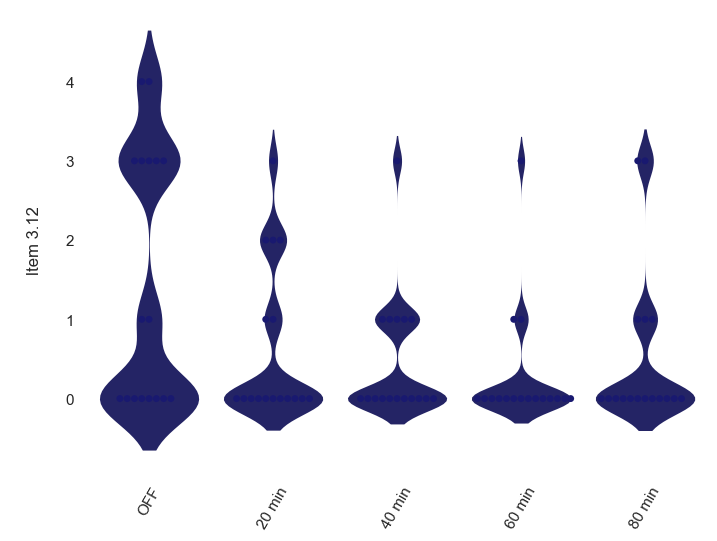

In [16]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.12", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.12", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.12 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [33]:
pg.friedman(data=output_wide_clinical, dv="Item_3.12", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.181373,4,12.333333,0.015037


In [34]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.12", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.098740,0.049187,0.015138,0.049187
20min,0.098740,1.000000,0.763771,0.459421,0.763771
40min,0.049187,0.763771,1.000000,0.670725,0.935817
60min,0.015138,0.459421,0.670725,1.000000,0.670725
80min,0.049187,0.763771,0.935817,0.670725,1.000000


# Item 3.15


In [35]:
output_wide_clinical.groupby("Group").describe()["Item_3.15"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,1.000000,1.322876,0.0,0.0,0.0,2.0,4.0
40min,17.0,0.294118,0.771744,0.0,0.0,0.0,0.0,3.0
60min,17.0,0.352941,0.785905,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.294118,0.685994,0.0,0.0,0.0,0.0,2.0
OFF,17.0,0.882353,1.166316,0.0,0.0,0.0,2.0,4.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


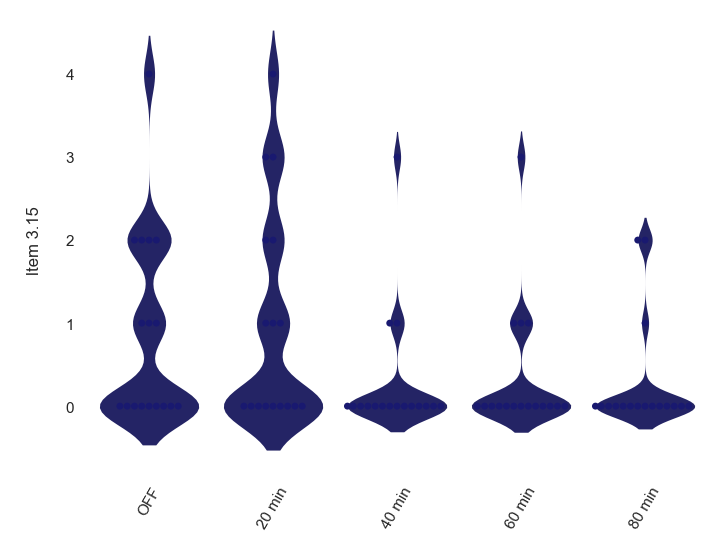

In [17]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.15", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.15", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.15 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [37]:
pg.friedman(data=output_wide_clinical, dv="Item_3.15", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.389237,4,26.468085,0.000025


In [38]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.15", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.838442,0.004814,0.008415,0.003598
20min,0.838442,1.000000,0.003233,0.003598,0.003233
40min,0.004814,0.003233,1.000000,0.864894,0.864894
60min,0.008415,0.003598,0.864894,1.000000,0.838442
80min,0.003598,0.003233,0.864894,0.838442,1.000000


# Item 3.17


In [39]:
output_wide_clinical.groupby("Group").describe()["Item_3.17"]

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
20min,17.0,0.823529,1.131111,0.0,0.0,0.0,1.0,4.0
40min,17.0,0.176471,0.528594,0.0,0.0,0.0,0.0,2.0
60min,17.0,0.235294,0.752447,0.0,0.0,0.0,0.0,3.0
80min,17.0,0.235294,0.562296,0.0,0.0,0.0,0.0,2.0
OFF,17.0,1.294118,1.490164,0.0,0.0,1.0,2.0,4.0


/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Inputs and Code/venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


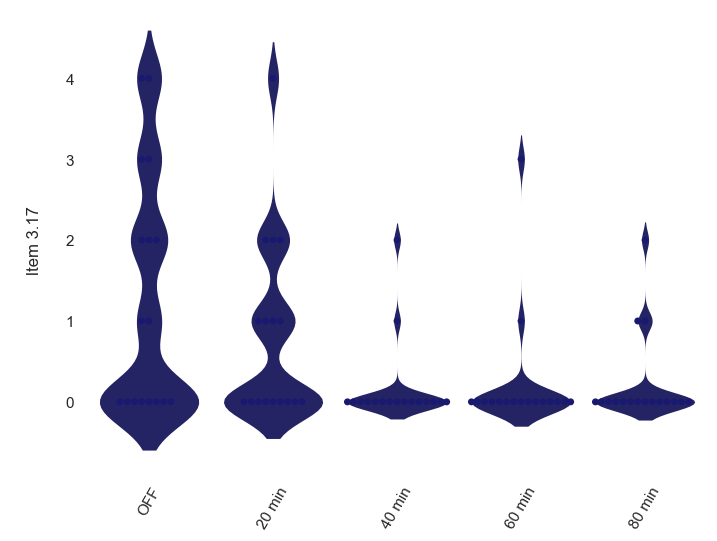

In [18]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Item_3.17", data=output_wide_clinical, color="midnightblue",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Item_3.17", x = "Group", data = output_wide_clinical, color="midnightblue", edgecolor = "midnightblue", size = 5, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Item 3.17 \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_xticklabels(['OFF', '20 min', '40 min', '60 min', '80 min'])

sns.set(rc={'figure.figsize':(8,6)})
sns.despine(left=True, bottom=True)

In [41]:
pg.friedman(data=output_wide_clinical, dv="Item_3.17", within="Group", subject="patient")


,Source,W,ddof1,Q,p-unc
Friedman,Group,0.361961,4,24.613333,0.00006


In [42]:
sp.posthoc_conover_friedman(a=output_wide_clinical, y_col="Item_3.17", group_col="Group", block_col="patient", p_adjust="fdr_bh", melted=True)


,OFF,20min,40min,60min,80min
OFF,1.000000,0.235963,0.001425,0.001859,0.001859
20min,0.235963,1.000000,0.025822,0.047972,0.048797
40min,0.001425,0.025822,1.000000,0.824694,0.824694
60min,0.001859,0.047972,0.824694,1.000000,0.934440
80min,0.001859,0.048797,0.824694,0.934440,1.000000


# OFF vs Best ON: Clinical Score
# _____________________________________________________________________________________

In [3]:
BestON_output_wide_clinical = pd.read_csv('BestON_output_wide_clinical.csv', sep = ';')

In [4]:
BestON_output_wide_clinical

,patient,Axial_OFF,Axial_BestON,Tremor_OFF,Tremor_BestON,Rigidity_OFF,Rigidity_BestON,Akinesia_OFF,Akinesia_BestON,MDS_UPDRS_I_OFF,MDS_UPDRS_I_BestON,MDS_UPDRS_II_OFF,MDS_UPDRS_II_BestON,MDS_UPDRS_III_OFF,MDS_UPDRS_III_BestON
0,A,0,1,0,0,13,6,31,5,4,4.0,9,0.0,63,14
1,B,3,0,3,0,12,0,28,4,6,5.0,24,7.0,58,7
2,C,0,3,0,0,9,2,24,14,15,10.0,27,18.0,45,22
3,D,1,2,1,0,8,3,18,8,8,5.0,24,3.0,41,17
4,E,2,2,2,0,3,1,15,6,10,9.0,13,7.0,35,11
5,F,6,1,6,1,11,4,22,5,14,7.0,37,1.0,61,16
6,G,0,2,0,0,9,5,25,15,18,9.0,28,3.0,50,26
7,H,0,1,0,0,11,6,21,7,21,12.0,20,5.0,39,17
8,I,6,1,6,1,10,6,18,8,4,4.0,1,0.0,42,19
9,J,4,1,4,2,6,3,20,8,6,5.0,9,2.0,37,18


In [5]:
list(BestON_output_wide_clinical)


['patient',
 'Axial_OFF',
 'Axial_BestON',
 'Tremor_OFF',
 'Tremor_BestON',
 'Rigidity_OFF',
 'Rigidity_BestON',
 'Akinesia_OFF',
 'Akinesia_BestON',
 'MDS_UPDRS_I_OFF',
 'MDS_UPDRS_I_BestON',
 'MDS_UPDRS_II_OFF',
 'MDS_UPDRS_II_BestON',
 'MDS_UPDRS_III_OFF',
 'MDS_UPDRS_III_BestON']

# MDS-UPDRS III

In [6]:
BestON_output_wide_clinical[['MDS_UPDRS_III_OFF','MDS_UPDRS_III_BestON']].describe()

,MDS_UPDRS_III_OFF,MDS_UPDRS_III_BestON
count,17.000000,17.000000
mean,50.411765,21.764706
std,11.253104,8.863756
min,35.000000,7.000000
25%,42.000000,17.000000
50%,47.000000,19.000000
75%,58.000000,27.000000
max,79.000000,40.000000


In [10]:
stats.wilcoxon(BestON_output_wide_clinical['MDS_UPDRS_III_OFF'], BestON_output_wide_clinical['MDS_UPDRS_III_BestON'])

WilcoxonResult(statistic=0.0, pvalue=1.52587890625e-05)

In [56]:
df1 = BestON_output_wide_clinical[['patient', 'MDS_UPDRS_III_OFF','MDS_UPDRS_III_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','UPDRS_III']
print (df1)

   patient                 Group  UPDRS_III
0        A     MDS_UPDRS_III_OFF         63
1        A  MDS_UPDRS_III_BestON         14
2        B     MDS_UPDRS_III_OFF         58
3        B  MDS_UPDRS_III_BestON          7
4        C     MDS_UPDRS_III_OFF         45
5        C  MDS_UPDRS_III_BestON         22
6        D     MDS_UPDRS_III_OFF         41
7        D  MDS_UPDRS_III_BestON         17
8        E     MDS_UPDRS_III_OFF         35
9        E  MDS_UPDRS_III_BestON         11
10       F     MDS_UPDRS_III_OFF         61
11       F  MDS_UPDRS_III_BestON         16
12       G     MDS_UPDRS_III_OFF         50
13       G  MDS_UPDRS_III_BestON         26
14       H     MDS_UPDRS_III_OFF         39
15       H  MDS_UPDRS_III_BestON         17
16       I     MDS_UPDRS_III_OFF         42
17       I  MDS_UPDRS_III_BestON         19
18       J     MDS_UPDRS_III_OFF         37
19       J  MDS_UPDRS_III_BestON         18
20       K     MDS_UPDRS_III_OFF         47
21       K  MDS_UPDRS_III_BestON

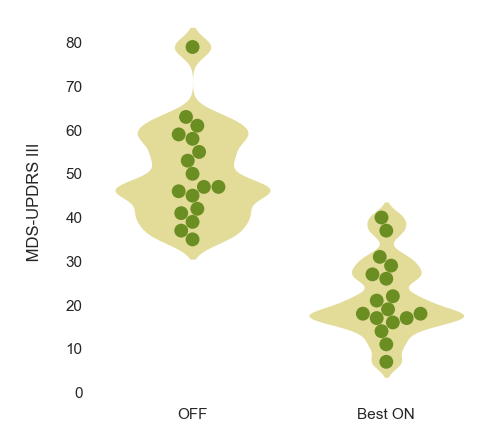

In [57]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="UPDRS_III", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "UPDRS_III", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n MDS-UPDRS III \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Axial Score

In [11]:
BestON_output_wide_clinical[['Axial_OFF','Axial_BestON']].describe()

,Axial_OFF,Axial_BestON
count,17.000000,17.000000
mean,2.235294,2.058824
std,2.332633,1.675955
min,0.000000,0.000000
25%,0.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,2.000000
max,6.000000,7.000000


In [12]:
stats.wilcoxon(BestON_output_wide_clinical['Axial_OFF'], BestON_output_wide_clinical['Axial_BestON'])

/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Clinical/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=48.0, pvalue=0.7761645393773187)

In [51]:
df1 = BestON_output_wide_clinical[['patient', 'Axial_OFF','Axial_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Axial Score']
print (df1)

   patient         Group  Axial Score
0        A     Axial_OFF            0
1        A  Axial_BestON            1
2        B     Axial_OFF            3
3        B  Axial_BestON            0
4        C     Axial_OFF            0
5        C  Axial_BestON            3
6        D     Axial_OFF            1
7        D  Axial_BestON            2
8        E     Axial_OFF            2
9        E  Axial_BestON            2
10       F     Axial_OFF            6
11       F  Axial_BestON            1
12       G     Axial_OFF            0
13       G  Axial_BestON            2
14       H     Axial_OFF            0
15       H  Axial_BestON            1
16       I     Axial_OFF            6
17       I  Axial_BestON            1
18       J     Axial_OFF            4
19       J  Axial_BestON            1
20       K     Axial_OFF            0
21       K  Axial_BestON            1
22       L     Axial_OFF            2
23       L  Axial_BestON            2
24       M     Axial_OFF            0
25       M  

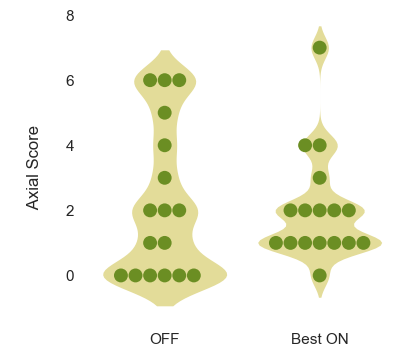

In [54]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Axial Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Axial Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Axial Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Tremor Score

In [23]:
BestON_output_wide_clinical[['Tremor_OFF','Tremor_BestON']].describe()

,Tremor_OFF,Tremor_BestON
count,17.000000,17.000000
mean,2.235294,0.647059
std,2.332633,1.114741
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,4.000000,1.000000
max,6.000000,4.000000


In [24]:
stats.wilcoxon(BestON_output_wide_clinical['Tremor_OFF'], BestON_output_wide_clinical['Tremor_BestON'])

/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Clinical/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.0031011384765966396)

In [58]:
df1 = BestON_output_wide_clinical[['patient', 'Tremor_OFF','Tremor_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Tremor Score']
print (df1)

   patient          Group  Tremor Score
0        A     Tremor_OFF             0
1        A  Tremor_BestON             0
2        B     Tremor_OFF             3
3        B  Tremor_BestON             0
4        C     Tremor_OFF             0
5        C  Tremor_BestON             0
6        D     Tremor_OFF             1
7        D  Tremor_BestON             0
8        E     Tremor_OFF             2
9        E  Tremor_BestON             0
10       F     Tremor_OFF             6
11       F  Tremor_BestON             1
12       G     Tremor_OFF             0
13       G  Tremor_BestON             0
14       H     Tremor_OFF             0
15       H  Tremor_BestON             0
16       I     Tremor_OFF             6
17       I  Tremor_BestON             1
18       J     Tremor_OFF             4
19       J  Tremor_BestON             2
20       K     Tremor_OFF             0
21       K  Tremor_BestON             0
22       L     Tremor_OFF             2
23       L  Tremor_BestON             1


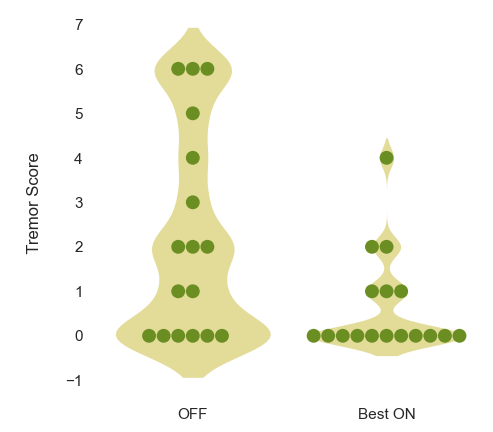

In [59]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Tremor Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Tremor Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Tremor Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Rigidity Score

In [21]:
BestON_output_wide_clinical[['Rigidity_OFF','Rigidity_BestON']].describe()

,Rigidity_OFF,Rigidity_BestON
count,17.000000,17.000000
mean,9.705882,4.294118
std,3.117786,2.733238
min,3.000000,0.000000
25%,8.000000,3.000000
50%,11.000000,4.000000
75%,12.000000,6.000000
max,14.000000,9.000000


In [22]:
stats.wilcoxon(BestON_output_wide_clinical['Rigidity_OFF'], BestON_output_wide_clinical['Rigidity_BestON'])

/Users/pauloandrediasbastos/Desktop/Levodopa Challenge Test/Clinical/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=0.0, pvalue=0.0004215235007220467)

In [60]:
df1 = BestON_output_wide_clinical[['patient', 'Rigidity_OFF','Rigidity_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Rigidity Score']
print (df1)

   patient            Group  Rigidity Score
0        A     Rigidity_OFF              13
1        A  Rigidity_BestON               6
2        B     Rigidity_OFF              12
3        B  Rigidity_BestON               0
4        C     Rigidity_OFF               9
5        C  Rigidity_BestON               2
6        D     Rigidity_OFF               8
7        D  Rigidity_BestON               3
8        E     Rigidity_OFF               3
9        E  Rigidity_BestON               1
10       F     Rigidity_OFF              11
11       F  Rigidity_BestON               4
12       G     Rigidity_OFF               9
13       G  Rigidity_BestON               5
14       H     Rigidity_OFF              11
15       H  Rigidity_BestON               6
16       I     Rigidity_OFF              10
17       I  Rigidity_BestON               6
18       J     Rigidity_OFF               6
19       J  Rigidity_BestON               3
20       K     Rigidity_OFF              13
21       K  Rigidity_BestON     

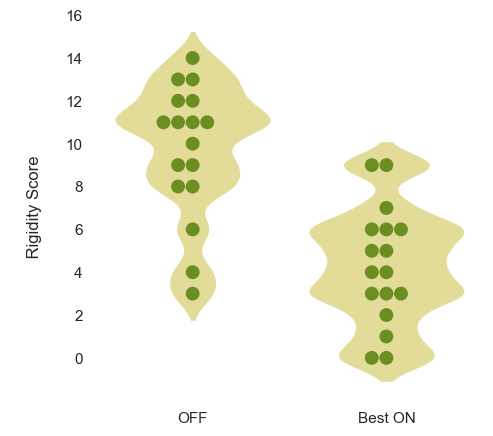

In [61]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Rigidity Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Rigidity Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Rigidity Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)

# Akinesia Score

In [13]:
BestON_output_wide_clinical[['Akinesia_OFF','Akinesia_BestON']].describe()

,Akinesia_OFF,Akinesia_BestON
count,17.000000,17.000000
mean,24.647059,11.411765
std,6.051252,6.255586
min,15.000000,4.000000
25%,20.000000,7.000000
50%,24.000000,8.000000
75%,31.000000,15.000000
max,35.000000,25.000000


In [20]:
stats.wilcoxon(BestON_output_wide_clinical['Akinesia_OFF'], BestON_output_wide_clinical['Akinesia_BestON'])

WilcoxonResult(statistic=0.0, pvalue=1.52587890625e-05)

In [62]:
df1 = BestON_output_wide_clinical[['patient', 'Akinesia_OFF','Akinesia_BestON']]
df1 = df1.set_index('patient').stack().reset_index()
df1.columns = ['patient','Group','Akinesia Score']
print (df1)

   patient            Group  Akinesia Score
0        A     Akinesia_OFF              31
1        A  Akinesia_BestON               5
2        B     Akinesia_OFF              28
3        B  Akinesia_BestON               4
4        C     Akinesia_OFF              24
5        C  Akinesia_BestON              14
6        D     Akinesia_OFF              18
7        D  Akinesia_BestON               8
8        E     Akinesia_OFF              15
9        E  Akinesia_BestON               6
10       F     Akinesia_OFF              22
11       F  Akinesia_BestON               5
12       G     Akinesia_OFF              25
13       G  Akinesia_BestON              15
14       H     Akinesia_OFF              21
15       H  Akinesia_BestON               7
16       I     Akinesia_OFF              18
17       I  Akinesia_BestON               8
18       J     Akinesia_OFF              20
19       J  Akinesia_BestON               8
20       K     Akinesia_OFF              22
21       K  Akinesia_BestON     

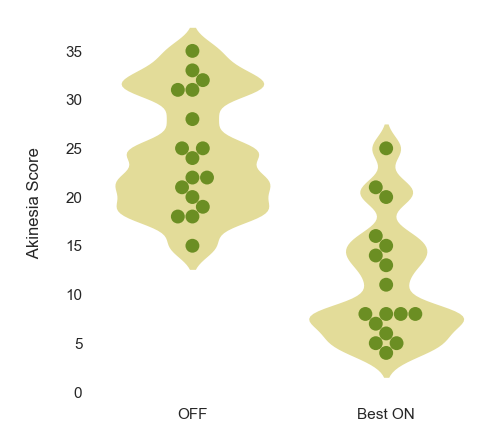

In [64]:
sns.set(style="white")

ax = sns.violinplot(x="Group", y="Akinesia Score", data=df1, color="khaki",  linewidth = 0, alpha = 1, scale="width", bw=0.2, cut=2)
sns.swarmplot(y = "Akinesia Score", x = "Group", data = df1, color="olivedrab", edgecolor = "olivedrab", size = 10, alpha = 1)

ax.set(xlabel=None)
ax.set(ylabel="\n Akinesia Score \n")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_xticklabels(['OFF', 'Best ON'])

sns.set(rc={'figure.figsize':(5,5)})
sns.despine(left=True, bottom=True)